<a href="https://colab.research.google.com/github/Shibli-Nomani/datascience/blob/main/Hw07Unsupervised_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd # data frame library
import numpy as np
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/AIQUEST ML Course/mall customers.csv'
df=pd.read_csv(path)
df.head(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [3]:
df = df.drop('CustomerID', axis=1)

In [4]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**To Rename the Column Name**

In [8]:
df = df.rename(columns={'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})

In [9]:
df.head(3)

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


**For Encoding**

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [11]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])


In [12]:
df.head(3)

,Gender,Age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


**Vizualization for Pattern Selection**

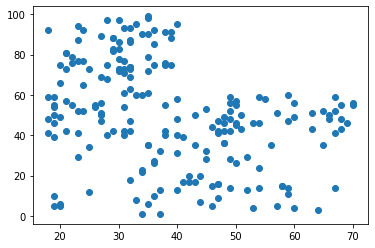

In [13]:
#Vizualization
plt.scatter(df['Age'], df['score'])

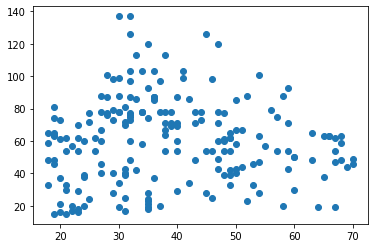

In [14]:
plt.scatter(df['Age'], df['income'])

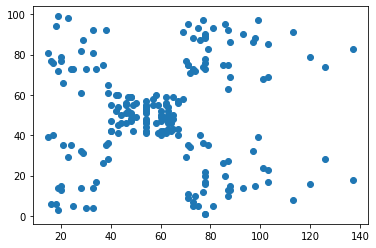

In [15]:
plt.scatter(df['income'], df['score'])

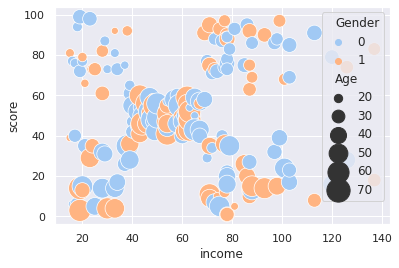

In [16]:
sns.set()
sns.scatterplot(
    data=df, x="income", y="score", hue="Gender", size="Age",
    sizes=(50, 540), hue_norm=(20, 100), legend="brief", palette="pastel"
)
from matplotlib import rcParams
rcParams['figure.figsize'] = 18,10

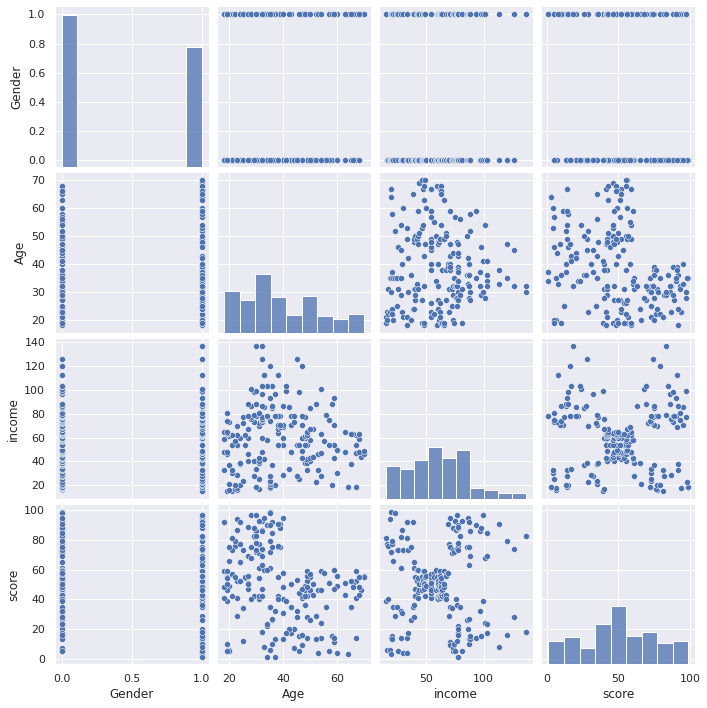

In [17]:
#pairplot
sns.pairplot(df[['Gender','Age', 'income', 'score']])

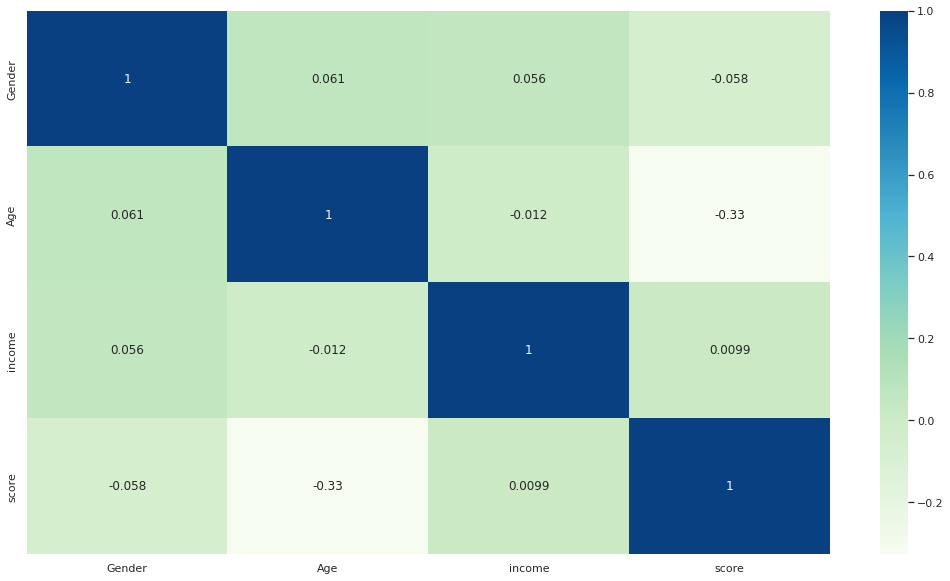

In [18]:
# Data Visualization for Corelation Matrix
sns.heatmap(df.corr(), cmap="GnBu", annot=True)


# **KMEAN Clustering Algorithm  (Unsupervised)**

In [19]:
import sklearn.cluster as cluster

In [20]:
kmeans = cluster.KMeans() #bydefault 8
kmeans

KMeans()

In [21]:
predicted = kmeans.fit_predict(df[['Gender','Age', 'income', 'score']])

In [22]:
predicted

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 7,
       2, 3, 4, 7, 7, 7, 4, 7, 7, 4, 4, 4, 4, 4, 7, 4, 4, 7, 4, 4, 4, 7,
       4, 4, 7, 7, 4, 4, 4, 4, 4, 7, 4, 7, 7, 4, 4, 7, 4, 4, 7, 4, 4, 7,
       7, 4, 4, 7, 4, 7, 7, 7, 4, 7, 4, 7, 7, 4, 4, 7, 4, 7, 4, 4, 4, 4,
       4, 7, 7, 7, 7, 7, 4, 4, 4, 4, 7, 7, 7, 1, 7, 1, 0, 1, 0, 1, 0, 1,
       7, 1, 0, 1, 0, 1, 0, 1, 0, 1, 7, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6], dtype=int32)

In [23]:
df['predicted_Cluster'] = predicted

In [24]:
df.head()

,Gender,Age,income,score,predicted_Cluster
0,1,19,15,39,2
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,3
4,0,31,17,40,2


**To check the number of clusters**

In [25]:
df.predicted_Cluster.unique()

array([2, 3, 4, 7, 1, 0, 5, 6], dtype=int32)

In [26]:
df1 = df[df.predicted_Cluster == 0]
df2 = df[df.predicted_Cluster == 1]
df3 = df[df.predicted_Cluster == 2]
df4 = df[df.predicted_Cluster == 3]
df5 = df[df.predicted_Cluster == 4]
df6 = df[df.predicted_Cluster == 5]
df7 = df[df.predicted_Cluster == 6]
df8 = df[df.predicted_Cluster == 7]

In [27]:
df1.head(2)

,Gender,Age,income,score,predicted_Cluster
126,1,43,71,35,0
128,1,59,71,11,0


In [28]:
df1.shape

(25, 5)

In [29]:
df2.head(2)

,Gender,Age,income,score,predicted_Cluster
123,1,39,69,91,1
125,0,31,70,77,1


In [30]:
df2.shape

(29, 5)

In [31]:
df7.head(2)

,Gender,Age,income,score,predicted_Cluster
181,0,32,97,86,6
183,0,29,98,88,6


In [32]:
df7.shape

(10, 5)

In [33]:
print(kmeans.cluster_centers_) # final centroids

[[  0.68        41.96        79.64        15.4       ]
 [  0.48275862  32.86206897  78.55172414  82.17241379]
 [  0.40909091  44.31818182  25.77272727  20.27272727]
 [  0.40909091  25.27272727  25.72727273  79.36363636]
 [  0.43181818  56.34090909  53.70454545  49.38636364]
 [  0.3         41.         109.7         22.        ]
 [  0.4         32.2        109.7         82.        ]
 [  0.34210526  27.          56.65789474  49.13157895]]


In [34]:
# To predict a new value
kmeans.predict([[0,	23,	70,	29]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([7], dtype=int32)

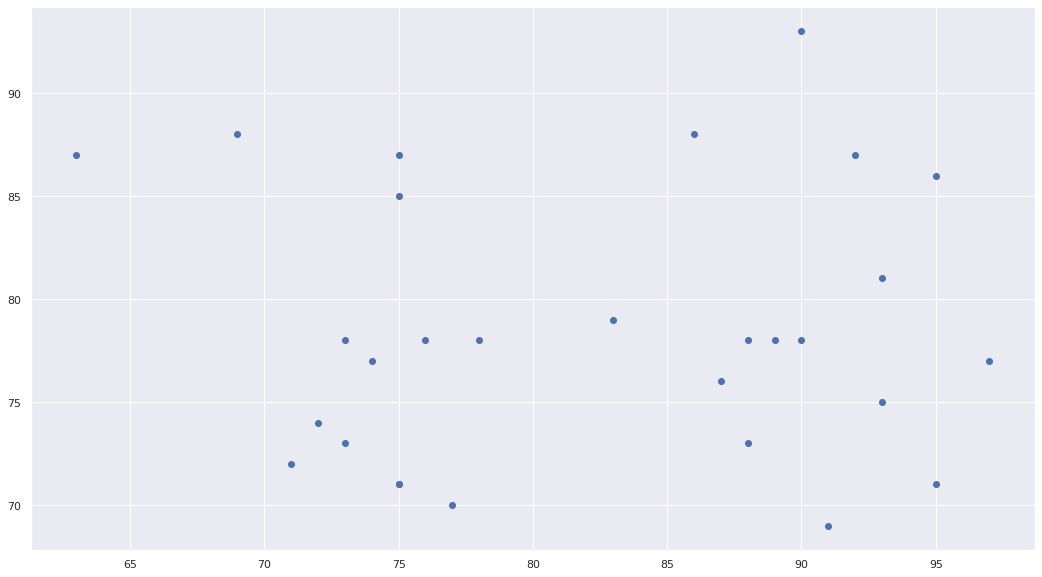

In [35]:
plt.scatter(df2['score'], df2['income'])

**Tunning and Cluster Optimization**

In [36]:
from sklearn.cluster import KMeans

wcss = []

clusters = range(1,15)

for k in range(1,15):
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit(df[['Gender','Age', 'income', 'score']])
    wcss.append(kmeans2.inertia_)  # inertia_ = Sum of the squared error , SSE

In [37]:
wcss

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75399.61541401484,
 58350.65449462818,
 51165.18423710792,
 44389.80767355766,
 40881.916995330255,
 37232.56812268341,
 35120.468802386735,
 32103.82995430495,
 29964.89547021607,
 28012.76148367915]

**To find the optimized no of clusters**

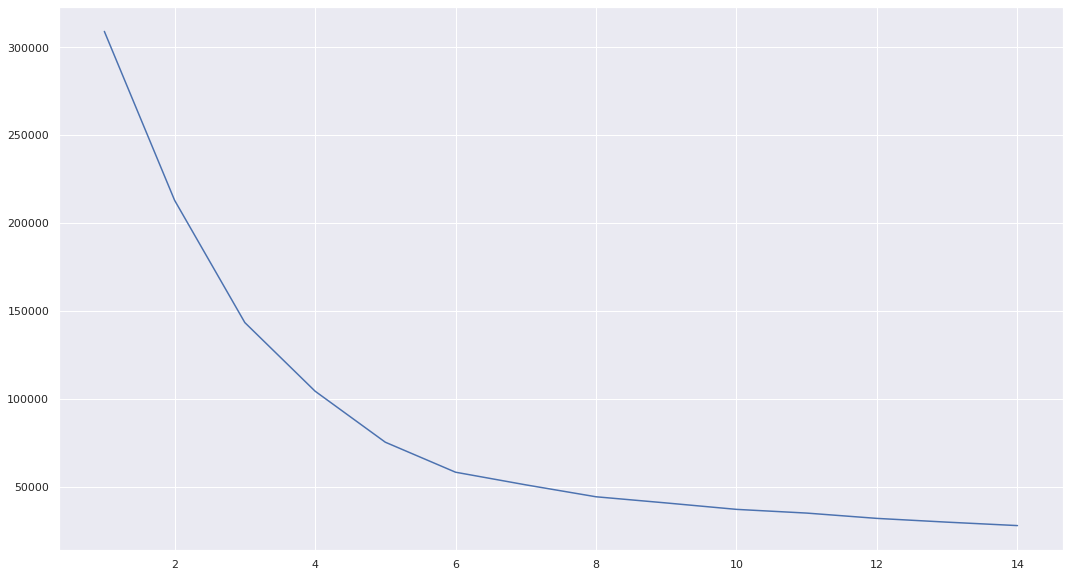

In [38]:
plt.plot(clusters , wcss) # elbow method

**Kneed Installation**

In [39]:
!pip install kneed

In [40]:
from kneed import KneeLocator
kn = KneeLocator(clusters , wcss, curve='convex', direction = 'decreasing' )

In [41]:
kn

In [42]:
optimal_num_cluster = kn.knee
print('optimal_num_cluster = ', optimal_num_cluster)

optimal_num_cluster =  5


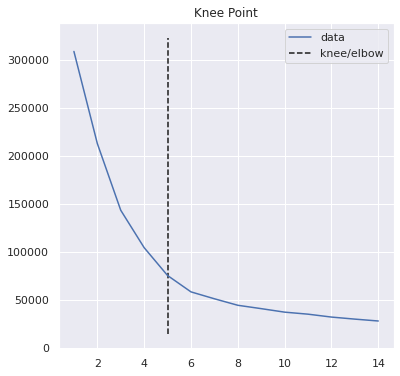

In [43]:
kn.plot_knee()

**Tuning K=5**

In [44]:
kmeans = cluster.KMeans(n_clusters=5)

In [45]:
new_predicted = kmeans.fit_predict(df[['Gender','Age', 'income', 'score']])

In [46]:
df['new_clusters'] = new_predicted

In [47]:
new_predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [48]:
df.head(3)

,Gender,Age,income,score,predicted_Cluster,new_clusters
0,1,19,15,39,2,3
1,1,21,15,81,3,4
2,0,20,16,6,2,3


In [49]:
df.new_clusters.unique()

array([3, 4, 1, 0, 2], dtype=int32)

In [50]:
print(kmeans.cluster_centers_) # final centroids

[[ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.41772152 43.12658228 54.82278481 49.83544304]
 [ 0.51351351 40.32432432 87.43243243 18.18918919]
 [ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.40909091 25.27272727 25.72727273 79.36363636]]
